# Average number of form fields which have data

In [1]:
import json
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.font_manager import fontManager

path = "../datasets.jsonl"
font_path = "../TaipeiSansTCBeta-Regular.ttf"

fontManager.addfont(font_path)
mpl.rc('font', family='Taipei Sans TC Beta')

o_dataset = []
with open(path, "r") as f: 
    line_count = 0
    for line in f:
      line_count += 1
    f.seek(0) 
    for i in range(line_count):
        line = f.readline()
        data = json.loads(line)
        o_dataset.append(data)
        
print(o_dataset[:2])

[{'author': '國立臺南大學流域生態環境保育研究中心', 'author_email': None, 'contact_email': '', 'contact_person': '', 'creator_user_id': 'b921b80f-2fef-4551-a2b3-5b252a84ec1d', 'data_type': ['doc', 'network'], 'end_time': '2023-09', 'groups': [], 'id': 'f4159f57-d620-4356-982a-5fa6d3501d9d', 'isopen': True, 'keywords': [], 'language': [], 'license_id': 'pd', 'license_title': 'Public Domain', 'license_url': 'https://creativecommons.org/publicdomain/mark/1.0/', 'maintainer': None, 'maintainer_email': None, 'metadata_created': '2022-12-31T01:52:30.320236', 'metadata_modified': '2023-08-25T03:34:40.265114', 'name': 'l15-l18', 'notes': '本工程施工期程為111/8/20～112/8/19(預計)，由金主營造工程股份有限公司委託本中心生態背景人員進行①檢閱施工廠商填查「生態保育措施自主檢查表*」內容並協助上傳至本資料集，以落實資訊公開之即時性；②第一級品管外部稽核三次(預計112年2-4月實施)，檢查生態保育措施執行情形。', 'num_resources': 19, 'num_tags': 2, 'organization': None, 'private': False, 'process_step': '', 'relationships_as_object': [], 'relationships_as_subject': [], 'remarks': '', 'resources': [{'cache_last_updated': None, 'cache_url': No

## 統計的 function

In [2]:
def statistic(list,dataset,num_field):
  total = len(dataset)
  count = 0
  for i in dataset:
    count += sum(1 for field in list if i.get(field) is not None and i[field]!='')
  return (count/total) / num_field, count


In [3]:
#後設資料列表
basic_field = ['title','url','notes','data_type','keywords','tags','langauge','remarks']
manage_field = ['license_id','author','process_step','contact_person','contact_email','owner_org']
time_field = ['temp_res','start_time','end_time','spatial','x_min','x_max','y_min','y_max','spatial_res']
resource_field = ['url','name']

total = len(o_dataset)
count_manage = 0
count_re = 0
count_basic = 0
count_time = 0

num_basic = 8 # some field is not in the field above
num_manage = 7
num_time = 9
num_re = 4
num_total = 28


# basic
percent_basic,count_basic = statistic(basic_field,o_dataset,num_basic)

# management
for i in o_dataset: 
  count_manage += sum(1 for field in basic_field if i.get(field) is not None and i[field]!='')
  if i['resources']:
    count_manage += (1 if i['resources'][0]['created'] !='' else 0)
percent_manage = (count_manage / total) / num_manage

#time&space
percent_time,count_time = statistic(time_field,o_dataset,num_time)

for i in o_dataset: #resource
  count_re += sum(1 for field in resource_field if i.get(field) is not None and i[field]!='')
  if i['resources']:
    count_re += (1 if i['resources'][0]['format'] !='' else 0)
  if i['organization']:
    count_re += (1 if i['organization']['description'] !='' else 0)
percent_re = (count_re / total) / num_re

total_count = count_time + count_basic + count_manage + count_re
percent_total = (total_count / total) / num_total


## 各項後設資料填答比率

average of basic 4.83    percent of basic: 60.34 %
average of manage 5.82    percent of manage: 83.17 %
average of time 2.02    percent of time: 22.46 %
average of resource 2.72    percent of resource: 67.92 %
average 15.39    percent: 54.96 %


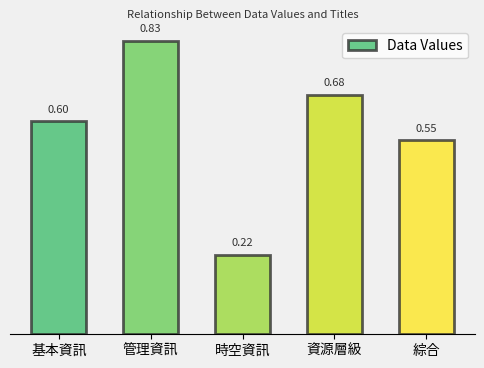

In [4]:
print('average of basic',round(count_basic/total,2),'   percent of basic:', round(percent_basic*100, 2), "%")
print('average of manage',round(count_manage/total,2),'   percent of manage:', round(percent_manage*100, 2), "%")
print('average of time',round(count_time/total,2),'   percent of time:', round(percent_time*100, 2), "%")
print('average of resource',round(count_re/total,2),'   percent of resource:', round(percent_re*100, 2), "%")
print('average',round(total_count/total,2),'   percent:', round(percent_total*100, 2), "%")


data = [percent_basic,percent_manage,percent_time,percent_re,percent_total]
titles = ['基本資訊', '管理資訊','時空資訊', '資源層級', '綜合']

fig, ax = plt.subplots(figsize=(6, 4)) # Create a figure and axis
fig.patch.set_facecolor('#f0f0f0') # Set background color
ax.set_facecolor('#f0f0f0')
# Create a gradient of colors
colors = plt.cm.viridis(np.linspace(0.7, 1, len(data)))
# Create the bar plot with rounded bars, shadows, and gradient colors
bars = ax.bar(titles, data, color=colors, align='center', width=0.6, edgecolor='#333333', linewidth=2, alpha=0.8, label='Data Values', zorder=2)
ax.set_title('Relationship Between Data Values and Titles', fontsize=8, color='#333333')
# Add data labels with custom font and size
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 5),  # 5 points vertical offset
                textcoords='offset points',
                ha='center', va='bottom', fontsize=8, color='#333333')

ax.legend()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.yticks([])
plt.show()